In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Loan_Data.csv')

data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
ds = data.copy()

In [4]:
ds = data.drop('Loan_ID', axis = 1)

ds.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
ds.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
category_data = ds.select_dtypes(exclude = 'number')
numerical_data = ds.select_dtypes(include = 'number')

print(f'Categorical Data')
display(category_data.head())
print(f'\nNumerical Data')
display(numerical_data.head())

Categorical Data


,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y



Numerical Data


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0


In [7]:
ds['Dependents'].sample(200).values
ds['Dependents'] = ds['Dependents'].str.replace('+', '')
ds['Dependents'] = pd.to_numeric(ds['Dependents'], errors = 'coerce')
ds['Dependents'].dtypes

dtype('float64')

In [8]:
new_cat = ds.select_dtypes(exclude = 'number')
new_num = ds.select_dtypes(include = 'number')

print(f'Categorical Data')
display(new_cat.head())
print(f'\nNumerical Data')
display(new_num.head())

Categorical Data


,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,Graduate,No,Urban,Y
1,Male,Yes,Graduate,No,Rural,N
2,Male,Yes,Graduate,Yes,Urban,Y
3,Male,Yes,Not Graduate,No,Urban,Y
4,Male,No,Graduate,No,Urban,Y



Numerical Data


,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.0,5849,0.0,NaN,360.0,1.0
1,1.0,4583,1508.0,128.0,360.0,1.0
2,0.0,3000,0.0,66.0,360.0,1.0
3,0.0,2583,2358.0,120.0,360.0,1.0
4,0.0,6000,0.0,141.0,360.0,1.0


In [9]:
for i in ds.columns:
    if ((ds[i].isnull().sum() / len(ds)) * 100) < 30:
        if ds[i].dtypes != 'O':
            ds[i].fillna(ds[i].median(), inplace = True)
        else:
            ds[i].fillna(ds[i].mode()[0], inplace = True)
    else:
        ds.drop(i, axis = 1, inplace = True)

ds.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [10]:
cols_to_scale = []
for i in new_num.columns:
    if ds[i].describe()[2] > 1500:
        cols_to_scale.append(i)

cols_to_scale

['ApplicantIncome', 'CoapplicantIncome']

In [11]:
# SCALE THE NUMERICAL COLUMNS
from sklearn.preprocessing import StandardScaler
import joblib

scaled = {}

for i in cols_to_scale[:]:
    scale = StandardScaler()
    ds[i] = scale.fit_transform(ds[[i]])
    joblib.dump(scale, open(f'{i}_scaler.pkl', 'wb'))
    scaled[i + '_scaler']=scale

scaled

{'ApplicantIncome_scaler': StandardScaler(),
 'CoapplicantIncome_scaler': StandardScaler()}

In [12]:
# LABEL ENCODE THE CATEGORICAL COLUMNS
from sklearn.preprocessing import LabelEncoder

encoded = {}  # ................................................................ Have a dictionary to save the encoders
for i in new_cat.columns: # ........................................................ Iterate through the categorical variables
    encode = LabelEncoder() # .................................................. Instantiate the encoder transformer
    ds[i] = encode.fit_transform(ds[i]) # ...................................... Encode the columns in ech iteration
    joblib.dump(encode, open(f'{i}_encoder.pkl', 'wb')) # ...................... Save the transformer to file for future reusal
    encoded[i +'_encoder'] = encode # .......................................... Save the transformer to the above stated dictionary for easy access

encoded

{'Gender_encoder': LabelEncoder(),
 'Married_encoder': LabelEncoder(),
 'Education_encoder': LabelEncoder(),
 'Self_Employed_encoder': LabelEncoder(),
 'Property_Area_encoder': LabelEncoder(),
 'Loan_Status_encoder': LabelEncoder()}

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

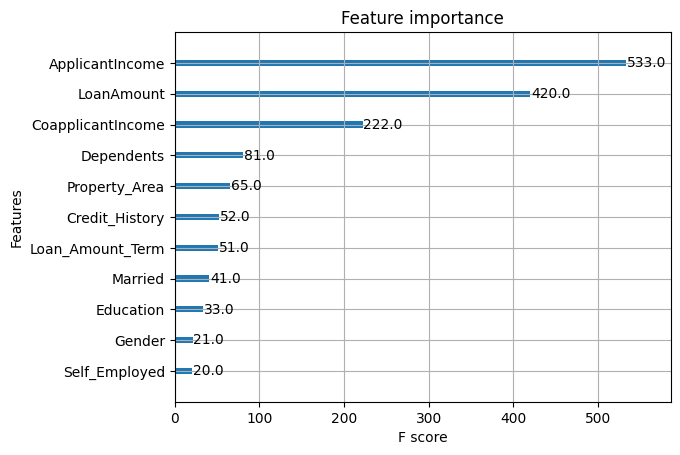

In [13]:
# conduct Feature Selection
# - Using XGBOOST to find feature importance

import matplotlib.pyplot as plt
import xgboost as xgb

model = xgb.XGBClassifier()

x = ds.drop('Loan_Status', axis = 1)
y = ds.Loan_Status

model.fit(x, y)

# Print feature importance scores
xgb.plot_importance(model, importance_type = 'weight')

In [14]:
sel_cols = ['ApplicantIncome', 'LoanAmount', 'CoapplicantIncome', 'Dependents', 'Property_Area',
            'Credit_History', 'Loan_Amount_Term', 'Loan_Status']

new_data = ds[sel_cols]
new_data.head()

,ApplicantIncome,LoanAmount,CoapplicantIncome,Dependents,Property_Area,Credit_History,Loan_Amount_Term,Loan_Status
0,0.072991,128.0,-0.554487,0.0,2,1.0,360.0,1
1,-0.134412,128.0,-0.038732,1.0,0,1.0,360.0,0
2,-0.393747,66.0,-0.554487,0.0,2,1.0,360.0,1
3,-0.462062,120.0,0.251980,0.0,2,1.0,360.0,1
4,0.097728,141.0,-0.554487,0.0,2,1.0,360.0,1


In [15]:
# Modelling
from sklearn.model_selection import train_test_split

x = new_data.drop('Loan_Status', axis = 1)
y = new_data.Loan_Status

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.10)
print(f'Xtrain: {xtrain.shape}')
print(f'Xtest: {xtest.shape}')
print(f'Ytrain: {ytrain.shape}')
print(f'Ytest: {ytest.shape}')

Xtrain: (552, 7)
Xtest: (62, 7)
Ytrain: (552,)
Ytest: (62,)


,ApplicantIncome,LoanAmount,CoapplicantIncome,Dependents,Property_Area,Credit_History,Loan_Amount_Term,Loan_Status
219,-0.183560,127.0,0.260530,2.0,1,1.0,360.0,1
271,0.940773,136.0,-0.554487,0.0,2,1.0,360.0,1
574,0.164241,150.0,-0.554487,3.0,1,1.0,360.0,0
95,0.225840,128.0,-0.554487,0.0,2,1.0,360.0,0
12,-0.381788,200.0,2.217871,2.0,2,1.0,360.0,1
...,...,...,...,...,...,...,...,...
337,-0.475660,176.0,1.018773,2.0,0,1.0,360.0,1
234,-0.368354,140.0,0.053954,1.0,1,1.0,360.0,1
490,-0.443059,96.0,0.398019,0.0,1,1.0,360.0,1
129,0.110834,182.0,0.324144,0.0,0,1.0,360.0,0


<Axes: xlabel='Loan_Status', ylabel='count'>

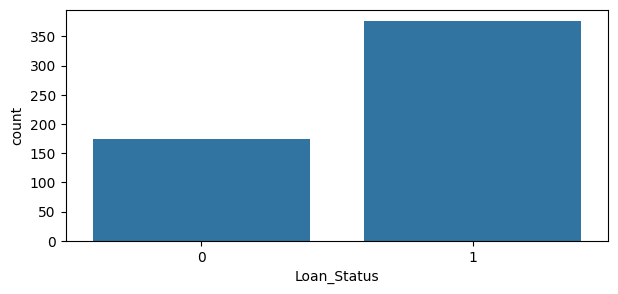

In [16]:
# # Logistic Regression Algorithm
# from sklearn.linear_model import LogisticRegression
# log_reg = LogisticRegression()

# log_reg.fit(xtrain, ytrain)
training_data = pd.concat([xtrain, ytrain], axis = 1)
plt.figure(figsize = (7,3))

display(training_data)
sns.countplot(x = training_data['Loan_Status'])

,ApplicantIncome,LoanAmount,CoapplicantIncome,Dependents,Property_Area,Credit_History,Loan_Amount_Term,Loan_Status
574,0.164241,150.0,-0.554487,3.0,1,1.0,360.0,0
95,0.225840,128.0,-0.554487,0.0,2,1.0,360.0,0
400,-0.411932,45.0,-0.554487,2.0,2,0.0,180.0,0
73,-0.106234,95.0,-0.554487,3.0,1,0.0,360.0,0
414,-0.533163,178.0,0.552609,0.0,1,0.0,360.0,0
...,...,...,...,...,...,...,...,...
85,-0.497613,136.0,0.311148,0.0,1,1.0,360.0,1
612,0.357064,187.0,-0.554487,2.0,2,1.0,360.0,1
124,-0.180775,194.0,0.134327,0.0,0,1.0,360.0,1
227,0.138685,210.0,0.025225,2.0,1,1.0,360.0,1


<Axes: xlabel='Loan_Status', ylabel='count'>

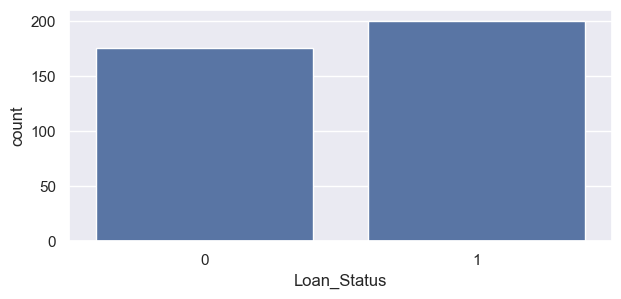

In [17]:
# from sklearn.metrics import classification_report, confusion_matrix

# cv = log_reg.predict(xtrain)
# print(classification_report(cv, ytrain))
class0 = training_data.loc[training_data['Loan_Status'] == 0]
class1 = training_data.loc[training_data['Loan_Status'] == 1]

new_class1 = class1.sample(200)

new_training_data = pd.concat([class0, new_class1], axis = 0)

display(new_training_data)
plt.figure(figsize = (7,3))
sns.set(style= 'darkgrid')
sns.countplot(x = new_training_data['Loan_Status'])

In [18]:
# sns.countplot(x = ds.Loan_Status)
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
xgb_model = xgb.XGBClassifier()

x = new_training_data.drop('Loan_Status', axis = 1)
y = new_training_data['Loan_Status']

xgb_model.fit(x, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [19]:
# from imblearn.under_sampling import RandomUnderSampler
# under_sampler = RandomUnderSampler(random_state= 45)
# X_resampled, y_resampled = under_sampler.fit_resample(x, y)
from sklearn.metrics import classification_report

cv = xgb_model.predict(xtest)
print(classification_report(cv, ytest))

              precision    recall  f1-score   support

           0       0.65      0.44      0.52        25
           1       0.69      0.84      0.76        37

    accuracy                           0.68        62
   macro avg       0.67      0.64      0.64        62
weighted avg       0.67      0.68      0.66        62



In [20]:
# Model Saving 
joblib.dump(xgb_model, open('LoanModel.pkl', 'wb'))

In [22]:
data['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)